In [1]:
import urllib
# dartNumber = 21414
from bs4 import BeautifulSoup
# url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
#         "&type=0&startyear=2011&startmonth=02&startday=24&endyear=2011&endmonth=03&" + 
#         "endday=26&submit=Submit")
# sock = urllib.request.urlopen(url).read().decode("utf-8")

# soup = BeautifulSoup(sock, 'html.parser')

In [2]:
def getCoordinatesFromSoup(soup):
    #Find the "meta" with all coordinates

    for meta in soup.find_all('meta'):
        if 'name' in meta.attrs and meta.attrs['name'] =='description':break

    # Parse its content

    s = meta.attrs['content']
    n,e = s[s.find("(")+1:s.find(")")].split()
    n = float(n[:-1]) if n[-1] == 'N' else -float(n[:-1])
    e = float(e[:-1]) if e[-1] == 'E' else -float(e[:-1])
    return e,n

In [4]:
def readAndWriteDARTBuoy(dartNumber):
    """
        Parses the online website info for the dart buoy,
        saves the time series to a file and returns its soup for further operations
    """
    import urllib
    from bs4 import BeautifulSoup
    url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
            "&type=0&startyear=2010&startmonth=02&startday=12&endyear=2010&endmonth=3&" + 
            "endday=12&submit=Submit")
    print(url)
    sock = urllib.request.urlopen(url).read().decode("utf-8")

    soup = BeautifulSoup(sock, 'html.parser')
    fileName = 'dart{}'.format(dartNumber)
        
    f = open(fileName,'w')
    f.write(soup.textarea.contents[0])
    f.close()
    
    print(os.popen('head '+fileName).read())
    
    return soup

In [5]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]

In [6]:
coordinates = {}

In [20]:
for dartNumber in DARTs:
    print(dartNumber)
    soup = readAndWriteDARTBuoy(dartNumber)
    coordinates[dartNumber]  = getCoordinatesFromSoup(soup)

21414
http://www.ndbc.noaa.gov/station_page.php?station=21414&type=0&startyear=2010&startmonth=02&startday=12&endyear=2010&endmonth=3&endday=12&submit=Submit
#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  s -      m
2010 03 12 00 00 00 1 9999.000
2010 03 11 23 45 00 1 9999.000
2010 03 11 23 30 00 1 9999.000
2010 03 11 23 15 00 1 9999.000
2010 03 11 23 00 00 1 9999.000
2010 03 11 22 45 00 1 9999.000
2010 03 11 22 30 00 1 9999.000
2010 03 11 22 15 00 1 9999.000

21419
http://www.ndbc.noaa.gov/station_page.php?station=21419&type=0&startyear=2010&startmonth=02&startday=12&endyear=2010&endmonth=3&endday=12&submit=Submit
#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  s -      m
2010 03 12 00 00 00 1 9999.000
2010 03 11 23 45 00 1 9999.000
2010 03 11 23 30 00 1 9999.000
2010 03 11 23 15 00 1 9999.000
2010 03 11 23 00 00 1 9999.000
2010 03 11 22 45 00 1 9999.000
2010 03 11 22 30 00 1 9999.000
2010 03 11 22 15 00 1 9999.000

21401
http://www.ndbc.noaa.gov/station_page.php?station=21401&type

#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  s -      m
2010 03 12 00 00 00 1 9999.000
2010 03 11 23 45 00 1 9999.000
2010 03 11 23 30 00 1 9999.000
2010 03 11 23 15 00 1 9999.000
2010 03 11 23 00 00 1 9999.000
2010 03 11 22 45 00 1 9999.000
2010 03 11 22 30 00 1 9999.000
2010 03 11 22 15 00 1 9999.000

32401
http://www.ndbc.noaa.gov/station_page.php?station=32401&type=0&startyear=2010&startmonth=02&startday=12&endyear=2010&endmonth=3&endday=12&submit=Submit
#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  s -      m
2010 03 12 00 00 00 1 9999.000
2010 03 11 23 45 00 1 9999.000
2010 03 11 23 30 00 1 9999.000
2010 03 11 23 15 00 1 9999.000
2010 03 11 23 00 00 1 9999.000
2010 03 11 22 45 00 1 9999.000
2010 03 11 22 30 00 1 9999.000
2010 03 11 22 15 00 1 9999.000



In [21]:
for k in coordinates.keys():
    print('{}: {{location:[{},{}]}},'.format("'"+str(k)+"'",coordinates[k][0],coordinates[k][1]))

'55012': {location:[158.453,-15.664]},
'51425': {location:[-176.262,-9.505]},
'51407': {location:[-156.545,19.57]},
'46404': {location:[-128.775,45.848]},
'46407': {location:[-128.835,42.705]},
'46411': {location:[-127.067,39.333]},
'46412': {location:[-120.582,32.4]},
'43412': {location:[-106.967,16.045]},
'43413': {location:[-100.083,11.012]},
'32411': {location:[-90.88,4.953]},
'32412': {location:[-86.374,-17.984]},
'32413': {location:[-93.517,-7.409]},
'32401': {location:[-73.421,-20.474]},
'21414': {location:[178.219,48.968]},
'21419': {location:[155.717,44.435]},
'21401': {location:[152.583,42.617]},
'21418': {location:[148.645,38.727]},
'21413': {location:[152.132,30.533]},
'52403': {location:[145.588,4.05]},
'52406': {location:[165.029,-5.329]},


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

21414
21419
21401
21418
21413
52403
52406
55012
51425
51407
46404
46407
46411
46412
43412
43413
32411
32412
32413
32401


[]

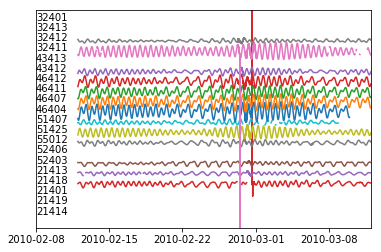

In [23]:
for i,dartNumber in enumerate(DARTs):
    print(dartNumber)
    params = {
        'filepath_or_buffer': 'dart{}'.format(dartNumber),
        'skiprows': 2,
        'delim_whitespace': True,
        'names' : 'year month day hour minute second T height'.split(),
        'na_values': 9999
    }
    df = pd.read_csv(**params)
    df['date'] = pd.to_datetime(df['year month day hour minute second'.split()])
    df = df['date height'.split()]

    plt.plot(df['date'],df['height']-df['height'].mean()+i*1.5)
    plt.text(df['date'].min()-pd.Timedelta(days=4),i*1.5,'{}'.format(dartNumber))
plt.ylim(-2,30)
plt.xlim(df['date'].min()-pd.Timedelta(days=4), df['date'].max())
plt.gca().set_yticks([])

# Plot on map

In [24]:
z = np.fromfile('bathymetry3min')

z[0],z[1]
z = np.reshape(z[2:],(int(z[0]),int(z[1])))

In [29]:
ncols,nrows = z.shape
xll = 90
yll = -70
cell = 1/60*3
xur = xll + (nrows-1)*cell
yur = yll + (ncols-1)*cell

In [30]:
xur,yur

(289.95000000000005, 69.95000000000002)

In [31]:
x = np.linspace(xll,xur,nrows)
y = np.linspace(yll,yur,ncols)

[158.453, -15.664]
[183.738, -9.505]
[203.455, 19.57]
[231.225, 45.848]
[231.165, 42.705]
[232.933, 39.333]
[239.418, 32.4]
[253.03300000000002, 16.045]
[259.91700000000003, 11.012]
[269.12, 4.953]
[273.626, -17.984]
[266.483, -7.409]
[286.579, -20.474]
[178.219, 48.968]
[155.717, 44.435]
[152.583, 42.617]
[148.645, 38.727]
[152.132, 30.533]
[145.588, 4.05]
[165.029, -5.329]


(90.0, 289.5, -70.0, 69.5)

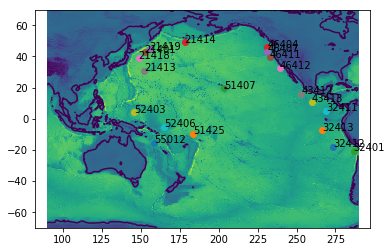

In [32]:
skip = 10
plt.pcolormesh(x[::skip], y[::skip], z[::skip, ::skip])
plt.contour(x[::skip], y[::skip], z[::skip, ::skip],[0.0])
for k in coordinates.keys():
    coordinates[k] = list(coordinates[k])
    
    if coordinates[k][0] < 0: 
        coordinates[k][0] = coordinates[k][0] + 360
    plt.scatter(coordinates[k][0] , coordinates[k][1])
    print(coordinates[k])
    plt.text(coordinates[k][0] , coordinates[k][1],'{}'.format(k),color='k')
plt.axis('equal')